In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
df = pd.read_csv('./content/titanic.csv', index_col=0)

print(df.info())
df.head(2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
None


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


Text(0.5, 1.0, 'Distribucion de sobrevivientes')

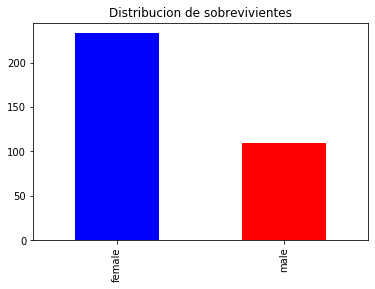

In [3]:
df[ df['Survived'] == 1 ]['Sex'].value_counts().plot(kind='bar', color=['b','r'])
plt.title('Distribucion de sobrevivientes')

In [4]:
df.columns[df.isna().any()]


Index(['Age', 'Cabin', 'Embarked'], dtype='object')

In [5]:
train_predictors = df.drop(columns=['Survived', 'Name', 'Ticket', 'Cabin']).copy()

train_predictors['Embarked'].fillna( train_predictors['Embarked'].value_counts().first_valid_index(), inplace=True )
train_predictors['Age'].fillna( train_predictors['Age'].median(), inplace=True )

In [6]:
number_cols = train_predictors.select_dtypes(include = 'number').columns.tolist()

categorical_cols = ( train_predictors.select_dtypes(include='object').nunique() < 10 )
categorical_cols = categorical_cols[categorical_cols == True].index.tolist()

train_cols = number_cols + categorical_cols
train_cols



['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex', 'Embarked']

In [7]:
# train_predictors = pd.get_dummies(train_predictors)
label_encoder = LabelEncoder()

encode_embarked = label_encoder.fit_transform( train_predictors['Embarked'] )
train_predictors['Embarked'] = encode_embarked
encode_sex = label_encoder.fit_transform( train_predictors['Sex'] )
train_predictors['Sex'] = encode_sex

train_predictors.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,1,22.0,1,0,7.2500,2
2,1,0,38.0,1,0,71.2833,0
3,3,0,26.0,0,0,7.9250,2


In [8]:
y_target = df['Survived'].values
x_features = pd.get_dummies(train_predictors).values

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x_features, y_target, train_size=0.8, random_state=None)
x_train.shape, x_test.shape

((712, 7), (179, 7))

In [10]:
tree_one = tree.DecisionTreeClassifier()
tree_one.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [11]:
score = tree_one.score(x_test, y_test)

print('Accuracy:  {:.2%}'.format(score))

Accuracy:  78.21%
